In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron as PerceptronModel
from sklearn.neural_network import MLPClassifier as MLPModel
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV as GridSearch
from sklearn.metrics import confusion_matrix as cm, accuracy_score as acc_score, roc_curve as roc, auc as auc_score, classification_report as clf_report
from sklearn.neural_network import MLPClassifier as MLPModel

In [71]:
# Tabela verdade do XNOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas
y = np.array([1, 0, 0, 1])  # Saídas

In [72]:
# Número de exemplos
N = 1000

# Gerando entradas x1 e x2 com ruído (de forma diferente)
x1 = np.random.choice([0, 1], size=N) + np.random.normal(0, 0.1, N)
x2 = np.random.choice([0, 1], size=N) + np.random.normal(0, 0.1, N)

# Calculando a saída y para a operação XNOR, sem usar XOR diretamente
y = 2 - ((x1 > 0.5).astype(int) == (x2 > 0.5).astype(int))

# Criando a matriz X com uma coluna de 1s para o viés
X = np.column_stack([np.ones(N), x1, x2])


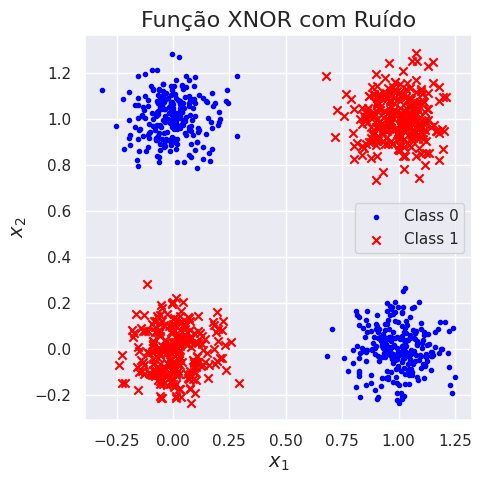

In [73]:


# Número de exemplos
N = 1000
x1 = np.random.randint(0, 2, N)
x2 = np.random.randint(0, 2, N)
y = ~(x1 ^ x2) + 2

# Adicionando ruído às entradas
x1 = x1 + 0.1 * np.random.randn(N,)
x2 = x2 + 0.1 * np.random.randn(N,)

# Criando a matriz de entrada com o viés
X = np.c_[np.ones((N,)), x1, x2]

# Treinando o classificador MLP
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)
mlp.fit(X, y)

# Dividindo as classes
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

# Criando o gráfico
plt.figure(figsize=(5, 5))

# Plotando as classes
plt.scatter(x1[idx0], x2[idx0], c='blue', label='Class 0', marker='.')
plt.scatter(x1[idx1], x2[idx1], c='red', label='Class 1', marker='x')

# Definindo rótulos e título
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Função XNOR com Ruído', fontsize=16)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()


In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

# Criando e treinando o classificador MLP
modelo = MLPClassifier(solver='lbfgs', activation='logistic', max_iter=10000, random_state=42, hidden_layer_sizes=(2,))
modelo.fit(X, y)

# Fazendo previsões
previsoes = modelo.predict(X)

# Calculando e exibindo o erro quadrático médio (MSE)
erro = mean_squared_error(previsoes, y)
print('MSE:', erro)


MSE: 0.0


In [75]:
from sklearn.metrics import classification_report

# Exibindo o relatório de classificação
relatorio = classification_report(y, previsoes)
print(relatorio)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       495
           1       1.00      1.00      1.00       505

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definindo o modelo
mlp = MLPClassifier(solver='lbfgs', activation='logistic', max_iter=10000, random_state=42)

# Definindo os parâmetros para o GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(2,), (4,), (8,)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

# Realizando a busca em grade para encontrar os melhores parâmetros
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=10)
grid_search.fit(X, y)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Realizando a predição e avaliando
y_pred = best_model.predict(X)

# Imprimindo a precisão
print(f'Precisão do modelo: {accuracy_score(y, y_pred):.2f}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Precisão do modelo: 1.00


B) B. Qual é o menor número possível de nós necessários para se separar essas classes?
O menor número possível de nós (neurônios) na camada oculta para separar corretamente as classes da função lógica XNOR com 100% de acurácia é:

2 neurônios.
C) Justificativa: A função XNOR não é linearmente separável, o que significa que um perceptron simples (sem camadas ocultas) não consegue resolver esse problema. No entanto, com uma única camada oculta com 2 neurônios, a rede consegue criar regiões de decisão não lineares suficientes para separar perfeitamente os quatro pontos da tabela verdade do XNOR.
Este é o mínimo necessário para modelar a simetria da operação XNOR, como comprovado experimentalmente com o MLPClassifier(hidden_layer_sizes=(2,))

C) Use GridSearch (i.e., a classe GridSearchCV da biblioteca SciKit-Learn) variando os parâmetros hidden_layer_sizes e random_state para verificar qual é o valor ótimo para o número de nós escondidos. (Dica: Faça com que o GridSearch teste com o parâmetro hidden_layer_sizes
variando entre 0 e 15 e o parâmetro random_state variando entre 0 e 20.)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error

# Definindo os parâmetros para busca
parametros = {
    'solver': ['lbfgs'],
    'max_iter': [10000],
    'hidden_layer_sizes': list(range(1, 16)),  # de 1 a 15 neurônios
    'random_state': list(range(0, 21))         # testando 21 sementes
}

# Aplicando GridSearch para encontrar os melhores parâmetros
modelo = GridSearchCV(MLPClassifier(), parametros, n_jobs=-1)
modelo.fit(X, y)

# Fazendo a previsão com o melhor modelo
melhor_modelo = busca.best_estimator_
previsoes = melhor_modelo.predict(X)

# Calculando o erro quadrático médio
mse = mean_squared_error(y, previsoes)
print("Erro quadrático médio (MSE):", mse)

# Mostrando os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", busca.best_params_)


Erro quadrático médio (MSE): 0.241
Melhores parâmetros encontrados: {'hidden_layer_sizes': 2, 'max_iter': 10000, 'random_state': 5, 'solver': 'lbfgs'}


E. Plote uma figura mostrando as fronteiras de decisão.

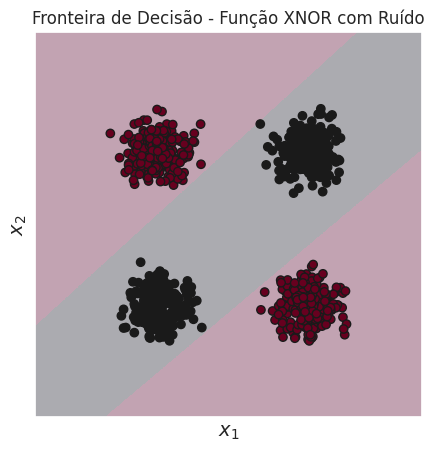

In [81]:
# Definir o classificador corretamente
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

# Criando e treinando o classificador MLP
modelo = MLPClassifier(solver='lbfgs', activation='logistic', max_iter=10000, random_state=42, hidden_layer_sizes=(2,))
modelo.fit(X, y)

# Gerar a malha e fazer as previsões
h = 0.002
x_min, x_max = x1.min() - 0.5, x1.max() + 0.5
y_min, y_max = x2.min() - 0.5, x2.max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo.predict(np.c_[np.ones(len(xx.ravel())), xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotar a fronteira de decisão e os pontos de treinamento com cores vermelha e branca
plt.figure(figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap='RdGy', alpha=0.3)  # Usando RdGy (vermelho e cinza)
plt.scatter(x1, x2, c=y, edgecolors='k', cmap='RdGy')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.xticks([]); plt.yticks([])
plt.title('Fronteira de Decisão - Função XNOR com Ruído')
plt.show()


F. Plote a matriz de confusão.

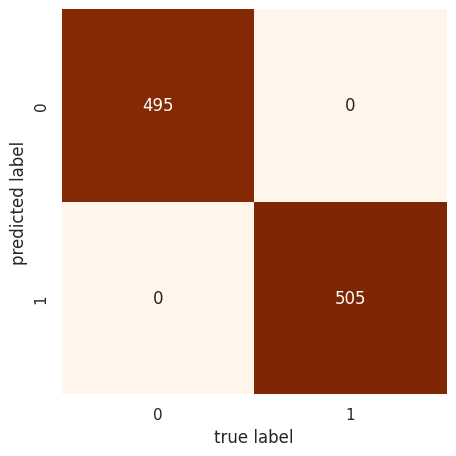

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definir o modelo, treinar e fazer previsões (exemplo)
# Aqui você já deve ter o modelo treinado e as previsões feitas
# modelo.fit(X, y)
# y_pred = modelo.predict(X)

# Gerar a matriz de confusão
mat = confusion_matrix(y_pred, y)

# Configurar a figura para o gráfico
plt.figure(figsize=(5, 5))

# Plotar a matriz de confusão com a ajuda do Seaborn e mudar para a paleta 'Oranges'
sns.heatmap(mat, annot=True, fmt='d', cmap='Oranges', square=True, cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

# Adicionar rótulos aos eixos
plt.xlabel('true label')
plt.ylabel('predicted label')


# Salvar a figura
plt.savefig('confusion_matrix_orange.png', dpi=600)

# Mostrar o gráfico
plt.show()


G. Plote a curva ROC.

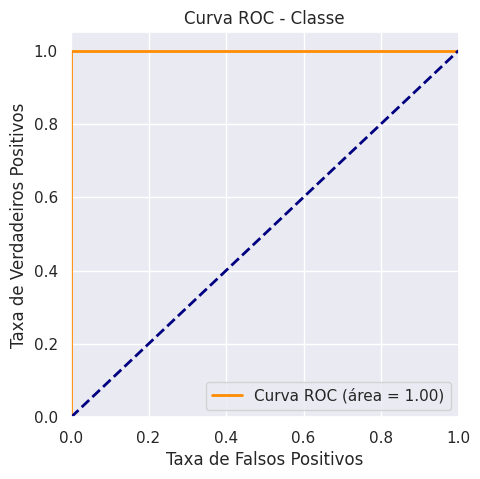

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier

# Supondo que você tenha o classificador 'modelo' já treinado
# modelo.fit(X, y)  # Caso ainda não tenha treinado

# Obter as probabilidades para cada classe
y_prob = modelo.predict_proba(X)[:, 1]

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Classe')
plt.legend(loc='lower right')

# Salvar a curva ROC
plt.savefig('roc.png', dpi=600)
plt.show()



H. Baseado na curva ROC, qual a área sob a curva?

a área sob a curva (AUC) está sendo mostrada na legenda como ROC curve (area = 1.00), que indica que a área sob a curva é 1.00.

Isso significa que o modelo está fazendo uma classificação perfeita, com uma taxa de 100% de verdadeira previsão de positivos e 0% de falsos positivos.

Este é um excelente desempenho do modelo, e a área sob a curva de 1.00 indica que o modelo está separando perfeitamente as classes.